## Machine Learning Model untuk Merekrut Pemain Bola

__data source__ : https://www.kaggle.com/karangadiya/fifa19

In [1]:
import pandas as pd
import chart_studio.plotly as pl
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
init_notebook_mode(connected=True)

In [3]:
cf.go_offline()

In [4]:
df = pd.read_csv('data 5.csv')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

       ... Composure Marking  StandingTackle SlidingTackle  GKDiving  \
0      ...      96.0    33.0            28.0          26.0       6.0   
1      ...      95.0    28.0            31.0          23.0       7.0   
2      ...      94.0    27.0            24.0          33.0       9.0   
3      ...      68.0    15.0            21.0          13.0      90.0   
4      ...      88.0    68.0            58.0          51.0      15.0   
...    ...       ...     ...             ...           ...       ...   
18202  ...      45.0    40.0            48.0          47.0      10.0   
18203  ...      42.0    22.0            15.0          19.0      10.0   
18204  ...      41.0    32.0            13.0          11.0       6.0   
18205  ...      46.0    20.0            25.0          27.0      14.0   
18206  ...      43.0    40.0            43.0          50.0      10.0   

       GKHandling  GKKicking GKPositioning GKReflexes Release Clause  
0          

In [7]:
## melihat nama dari semua column

df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [8]:
## Mengcopy dataset nya

data = df.copy()

In [9]:
## Melihat data type dari masing-masing kolom

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [10]:
data.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

<hr>

## EDA (Exploratory Data Analysis)

In [11]:
### untuk kolom age,overall,potential

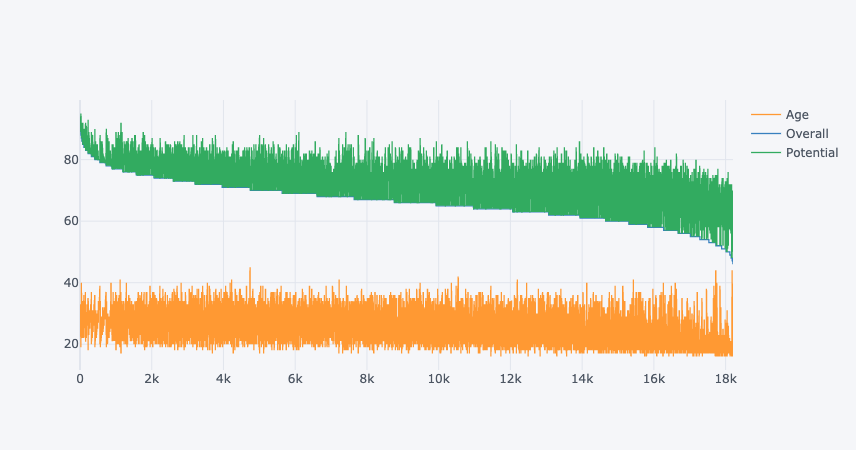

In [12]:
## line chart

data[['Age','Overall','Potential']].iplot()

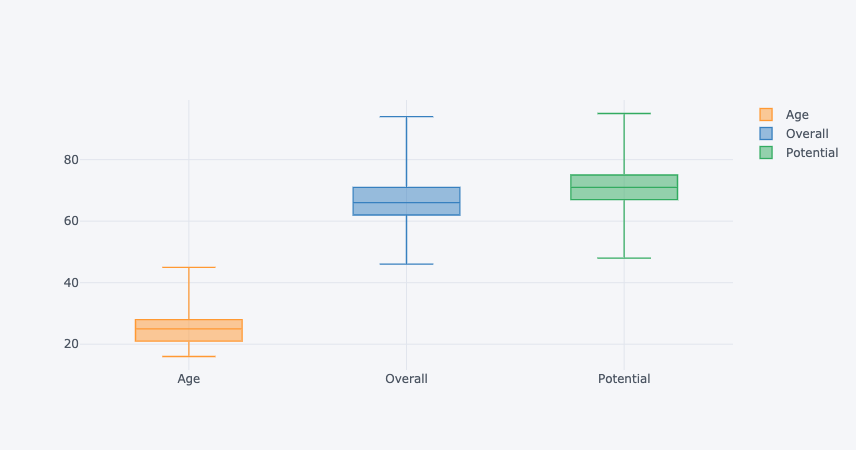

In [13]:
## boxplot

data[['Age','Overall','Potential']].iplot(kind='box')

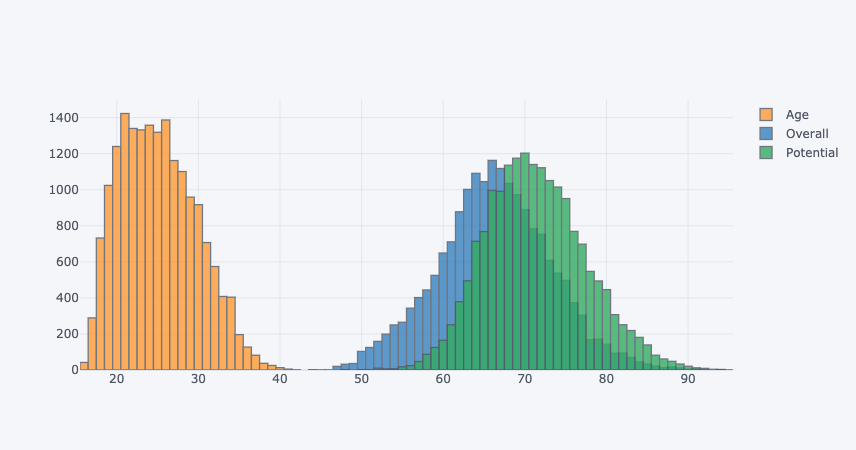

In [14]:
## histogram

data[['Age','Overall','Potential']].iplot(kind='hist')

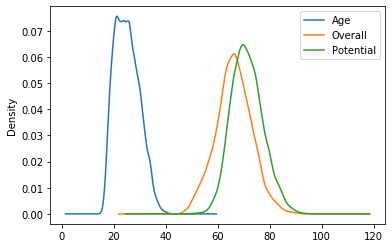

In [15]:
## Melihat kurva density nya dari masing-masing kolom

data[['Age','Overall','Potential']].plot.density()

- Mohon di download file ini untuk melihat hasil plotly nya

In [16]:
## melihat karakteristik datanya untuk setiap kolom

data.describe()

ID           Age       Overall     Potential       Special  \
count   18207.000000  18207.000000  18207.000000  18207.000000  18207.000000   
mean   214298.338606     25.122206     66.238699     71.307299   1597.809908   
std     29965.244204      4.669943      6.908930      6.136496    272.586016   
min        16.000000     16.000000     46.000000     48.000000    731.000000   
25%    200315.500000     21.000000     62.000000     67.000000   1457.000000   
50%    221759.000000     25.000000     66.000000     71.000000   1635.000000   
75%    236529.500000     28.000000     71.000000     75.000000   1787.000000   
max    246620.000000     45.000000     94.000000     95.000000   2346.000000   

       International Reputation     Weak Foot   Skill Moves  Jersey Number  \
count              18159.000000  18159.000000  18159.000000   18147.000000   
mean                   1.113222      2.947299      2.361308      19.546096   
std                    0.394031      0.660456      0.756164      15.947765   
min                    1.000000      1.000000      1.000000       1.000000   
25%                    1.000000      3.000000      2.000000       8.000000   
50%                    1.000000      3.000000      2.000000      17.000000   
75%                    1.000000      3.000000      3.000000      26.000000   
max                    5.000000      5.000000      5.000000      99.000000   

           Crossing  ...     Penalties     Composure       Marking  \
count  18159.000000  ...  18159.000000  18159.000000  18159.000000   
mean      49.734181  ...     48.548598     58.648274     47.281623   
std       18.364524  ...     15.704053     11.436133     19.904397   
min        5.000000  ...      5.000000      3.000000      3.000000   
25%       38.000000  ...     39.000000     51.000000     30.000000   
50%       54.000000  ...     49.000000     60.000000     53.000000   
75%       64.000000  ...     60.000000     67.000000     64.000000   
max       93.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 43 columns]

In [17]:
## melihat karakteristik datanya untuk kolom Age, Overall, dan Potential

data[['Age','Overall','Potential']].describe()

Age       Overall     Potential
count  18207.000000  18207.000000  18207.000000
mean      25.122206     66.238699     71.307299
std        4.669943      6.908930      6.136496
min       16.000000     46.000000     48.000000
25%       21.000000     62.000000     67.000000
50%       25.000000     66.000000     71.000000
75%       28.000000     71.000000     75.000000
max       45.000000     94.000000     95.000000

#### karakteristik pemain yang dicari:
- 1. usia < 25
- 2. overall >= 80
- 3. potential >= 80

- Jika sesuai dengan karakteristik yang dicari maka diberi target 1, dan bila tidak sesuai diberi target 0

In [18]:
data['target'] = data.apply(lambda x: 1 if x['Age']<25 and x['Overall']>=80 and x['Potential']>=80 else 0,axis=1)

In [19]:
data

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

       ... Marking StandingTackle  SlidingTackle GKDiving  GKHandling  \
0      ...    33.0           28.0           26.0      6.0        11.0   
1      ...    28.0           31.0           23.0      7.0        11.0   
2      ...    27.0           24.0           33.0      9.0         9.0   
3      ...    15.0           21.0           13.0     90.0        85.0   
4      ...    68.0           58.0           51.0     15.0        13.0   
...    ...     ...            ...            ...      ...         ...   
18202  ...    40.0           48.0           47.0     10.0        13.0   
18203  ...    22.0           15.0           19.0     10.0         9.0   
18204  ...    32.0           13.0           11.0      6.0         5.0   
18205  ...    20.0           25.0           27.0     14.0         6.0   
18206  ...    40.0           43.0           50.0     10.0        15.0   

       GKKicking  GKPositioning GKReflexes Release Clause target  
0  

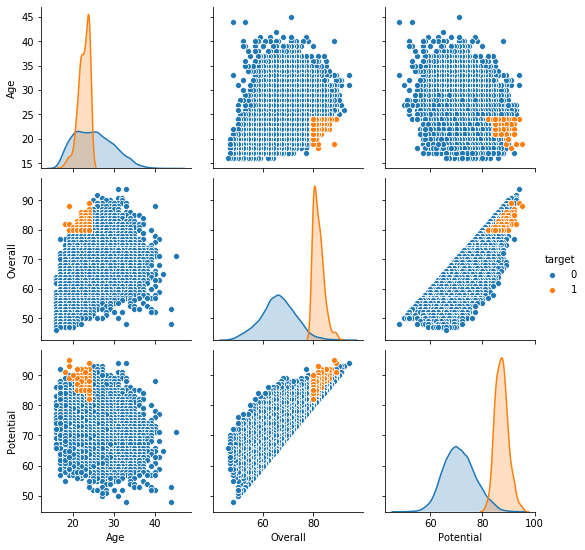

In [20]:
sns.pairplot(data[['Age','Overall','Potential','target']],hue='target')

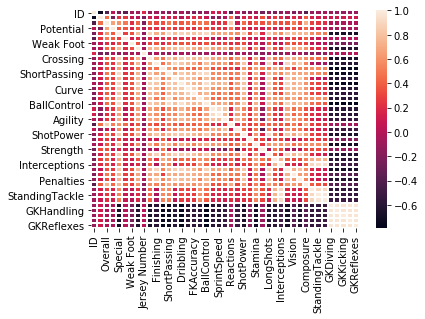

In [21]:
sns.heatmap(df.corr(),linewidths=1)

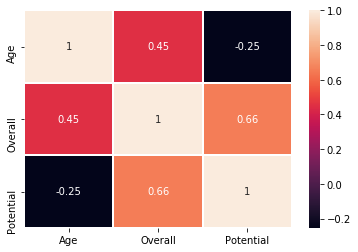

In [22]:
sns.heatmap(df[['Age','Overall','Potential']].corr(),annot=True,linewidths=1)

In [23]:
## karakteristik pemain yang dicari:
### usia < 25
### overall dan potential >= 80

In [24]:
## Selected Data

new_data = data.copy()
new_data

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

       ... Marking StandingTackle  SlidingTackle GKDiving  GKHandling  \
0      ...    33.0           28.0           26.0      6.0        11.0   
1      ...    28.0           31.0           23.0      7.0        11.0   
2      ...    27.0           24.0           33.0      9.0         9.0   
3      ...    15.0           21.0           13.0     90.0        85.0   
4      ...    68.0           58.0           51.0     15.0        13.0   
...    ...     ...            ...            ...      ...         ...   
18202  ...    40.0           48.0           47.0     10.0        13.0   
18203  ...    22.0           15.0           19.0     10.0         9.0   
18204  ...    32.0           13.0           11.0      6.0         5.0   
18205  ...    20.0           25.0           27.0     14.0         6.0   
18206  ...    40.0           43.0           50.0     10.0        15.0   

       GKKicking  GKPositioning GKReflexes Release Clause target  
0  

In [25]:
## cek data yang sesuai dengan klasifikasi

data[(data['Age']<25)&(data['Overall']>=80)& (data['Potential']>=80)]

ID                   Name  Age  \
15   211110              P. Dybala   24   
16   202126                H. Kane   24   
25   231747              K. Mbappé   19   
42   205600              S. Umtiti   24   
55   222492                L. Sané   22   
..      ...                    ...  ...   
464  203747        Héctor Bellerín   23   
469  202477               Deulofeu   24   
470  202335                E. Dier   24   
475  200458               L. Digne   24   
481  198784  A. Oxlade-Chamberlain   24   

                                              Photo Nationality  \
15   https://cdn.sofifa.org/players/4/19/211110.png   Argentina   
16   https://cdn.sofifa.org/players/4/19/202126.png     England   
25   https://cdn.sofifa.org/players/4/19/231747.png      France   
42   https://cdn.sofifa.org/players/4/19/205600.png      France   
55   https://cdn.sofifa.org/players/4/19/222492.png     Germany   
..                                              ...         ...   
464  https://cdn.sofifa.org/players/4/19/203747.png       Spain   
469  https://cdn.sofifa.org/players/4/19/202477.png       Spain   
470  https://cdn.sofifa.org/players/4/19/202335.png     England   
475  https://cdn.sofifa.org/players/4/19/200458.png      France   
481  https://cdn.sofifa.org/players/4/19/198784.png     England   

                                    Flag  Overall  Potential  \
15   https://cdn.sofifa.org/flags/52.png       89         94   
16   https://cdn.sofifa.org/flags/14.png       89         91   
25   https://cdn.sofifa.org/flags/18.png       88         95   
42   https://cdn.sofifa.org/flags/18.png       87         92   
55   https://cdn.sofifa.org/flags/21.png       86         92   
..                                   ...      ...        ...   
464  https://cdn.sofifa.org/flags/45.png       80         85   
469  https://cdn.sofifa.org/flags/45.png       80         82   
470  https://cdn.sofifa.org/flags/14.png       80         84   
475  https://cdn.sofifa.org/flags/18.png       80         84   
481  https://cdn.sofifa.org/flags/14.png       80         85   

                    Club                                      Club Logo  ...  \
15              Juventus    https://cdn.sofifa.org/teams/2/light/45.png  ...   
16     Tottenham Hotspur    https://cdn.sofifa.org/teams/2/light/18.png  ...   
25   Paris Saint-Germain    https://cdn.sofifa.org/teams/2/light/73.png  ...   
42          FC Barcelona   https://cdn.sofifa.org/teams/2/light/241.png  ...   
55       Manchester City    https://cdn.sofifa.org/teams/2/light/10.png  ...   
..                   ...                                            ...  ...   
464              Arsenal     https://cdn.sofifa.org/teams/2/light/1.png  ...   
469              Watford  https://cdn.sofifa.org/teams/2/light/1795.png  ...   
470    Tottenham Hotspur    https://cdn.sofifa.org/teams/2/light/18.png  ...   
475              Everton     https://cdn.sofifa.org/teams/2/light/7.png  ...   
481            Liverpool     https://cdn.sofifa.org/teams/2/light/9.png  ...   

    Marking StandingTackle  SlidingTackle GKDiving  GKHandling  GKKicking  \
15     23.0           20.0           20.0      5.0         4.0        4.0   
16     56.0           36.0           38.0      8.0        10.0       11.0   
25     34.0           34.0           32.0     13.0         5.0        7.0   
42     90.0           89.0           86.0     15.0        10.0       14.0   
55     36.0           32.0           35.0      8.0        12.0        9.0   
..      ...            ...            ...      ...         ...        ...   
464    75.0           78.0           80.0      8.0        14.0       14.0   
469    34.0           30.0           22.0     12.0        16.0       14.0   
470    82.0           81.0           83.0     11.0        14.0        6.0   
475    73.0           77.0           82.0      6.0        12.0        9.0   
481    67.0           70.0           66.0     16.0         9.0        6.0   

     GKPositioning GKReflexes Re

In [26]:
data['target'].value_counts()

0    18084
1      123
Name: target, dtype: int64

<hr>

## Machine Learning Section

In [27]:
#### 1. Logistic Regression
#### 2. Decision Tree
#### 3. Random Forest

In [28]:
X = data[['Age','Overall','Potential']]
y = data['target']

In [29]:
X

Age  Overall  Potential
0       31       94         94
1       33       94         94
2       26       92         93
3       27       91         93
4       27       91         92
...    ...      ...        ...
18202   19       47         65
18203   19       47         63
18204   16       47         67
18205   17       47         66
18206   16       46         66

[18207 rows x 3 columns]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

__Machine Learning Model dengan Logistic Regression__

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model1= LogisticRegression()

In [34]:
model1.fit(X_train,y_train)

LogisticRegression()

In [35]:
pred = model1.predict(X_test)

In [36]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
## evaluation metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5427
           1       0.48      0.36      0.41        36

    accuracy                           0.99      5463
   macro avg       0.74      0.68      0.70      5463
weighted avg       0.99      0.99      0.99      5463



In [39]:
cross_val_score(model1,X_train,y_train,cv=5).mean()

0.9949781765619908

__Machine Learning Model dengan Decision Tree__

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model2 = DecisionTreeClassifier()

In [42]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
model2.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
pred2 = model2.predict(X_test)

In [45]:
## evaluation metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [46]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5427
           1       1.00      1.00      1.00        36

    accuracy                           1.00      5463
   macro avg       1.00      1.00      1.00      5463
weighted avg       1.00      1.00      1.00      5463



In [47]:
cross_val_score(model2,X_train,y_train,cv=5).mean()

0.9998430757159671

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,pred2)

1.0

In [50]:
from sklearn import tree

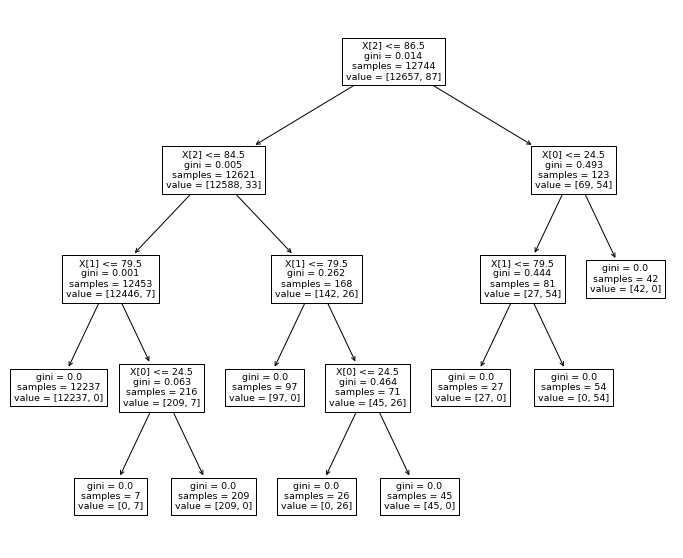

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12,10])
tree.plot_tree(model2)
plt.show()

In [52]:
from sklearn import tree
import graphviz

In [53]:
fitur = list(X.columns)
fitur

['Age', 'Overall', 'Potential']

In [54]:
c = []
for i in data['target']:
    c.append(i)
    
b = set(c)
k = []
for j in b:
    k.append(str(j))

In [55]:
k

['0', '1']

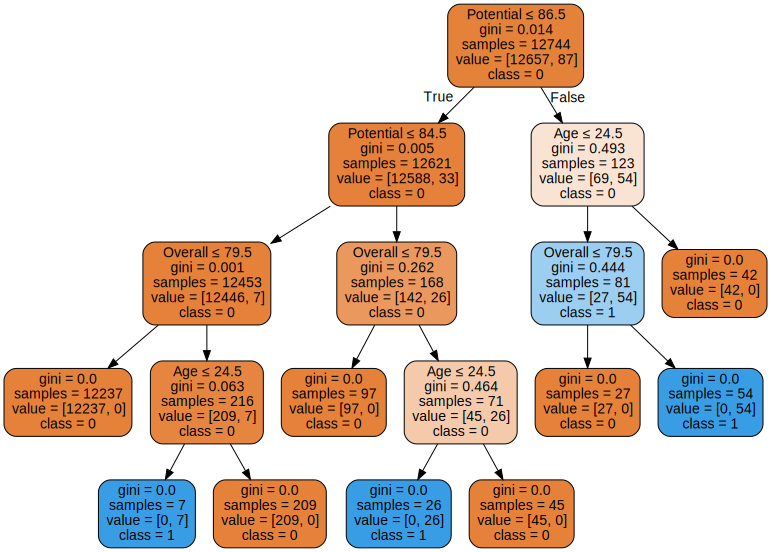

In [56]:
dot_data = tree.export_graphviz(model2, out_file=None,
                                feature_names=fitur,
                                class_names=k,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

__Machine Learning Model dengan Random Forest Classifier__

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model3 = RandomForestClassifier()

In [59]:
model3.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
pred3 = model3.predict(X_test)

In [61]:
## evaluation metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [62]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5427
           1       1.00      1.00      1.00        36

    accuracy                           1.00      5463
   macro avg       1.00      1.00      1.00      5463
weighted avg       1.00      1.00      1.00      5463



In [63]:
cross_val_score(model3,X_train,y_train,cv=5)

array([1., 1., 1., 1., 1.])

<hr>

## Pemilihan Model Machine Learning

In [64]:
print(f'Logistic Regression : ',cross_val_score(model1,X_train,y_train,cv=5).mean())
print(f'Decision Tree : ',cross_val_score(model2,X_train,y_train,cv=5).mean())
print(f'Random Forest Classifier: ',cross_val_score(model3,X_train,y_train,cv=5).mean())

Logistic Regression :  0.9949781765619908
Decision Tree :  0.9998430757159671
Random Forest Classifier:  1.0


In [65]:
print(f'Logistic Regression : ',cross_val_score(model1,X_train,y_train,cv=5))
print(f'Decision Tree : ',cross_val_score(model2,X_train,y_train,cv=5))
print(f'Random Forest Classifier: ',cross_val_score(model3,X_train,y_train,cv=5))

Logistic Regression :  [0.99529227 0.99372303 0.99372303 0.99529227 0.99686028]
Decision Tree :  [1.         0.99921538 1.         1.         1.        ]
Random Forest Classifier:  [1. 1. 1. 1. 1.]


Berdasarkan hasil dari masing-masing model machine Learning, bahwa random forest classifier merupakan model terbaik dan saya memilih menggunakan model random forest classifier

<hr>

## Misalkan ada data baru 

##### __Not Real Data__

Dimisalkan saya sebagai pelatih ingin merekrut pemain dengan list data dibawah ini, saya akan mencari pemain yang tepat dari hasil model machine learning yang saya telah buat sesuai dengan karakteristik yang telah ditentukan

In [66]:
New_Data = [
    {'Name': 'Andik Vermansyah', 'Club': 'Madura United FC', 'Age':27, 'Overall':87, 'Potential':90},
    {'Name': 'Awan Setho Raharjo', 'Club': 'Bhayangkara FC', 'Age':22, 'Overall':75, 'Potential':83},
    {'Name': 'Bambang Pamungkas', 'Club': 'Persija Jakarta','Age':38, 'Overall':85, 'Potential':75},
    {'Name': 'Cristian Gonzales', 'Club': 'PSS Sleman', 'Age':43, 'Overall':90, 'Potential':85},
    {'Name': 'Egy Maulana Vikri', 'Club': 'Lechia Gdańsk', 'Age':18, 'Overall':88, 'Potential':90},
    {'Name': 'Evan Dimas', 'Club': 'Barito Putera', 'Age':24, 'Overall':85, 'Potential':87},
    {'Name': 'Febri Hariyadi', 'Club': 'Persib Bandung','Age':23, 'Overall':77, 'Potential':80},
    {'Name': 'Hansamu Yama Pranata', 'Club': 'Persebaya Surabaya', 'Age':24, 'Overall':82, 'Potential':85},
    {'Name': 'Septian David Maulana', 'Club': 'PSIS Semarang', 'Age':22, 'Overall':83, 'Potential':80},
    {'Name': 'Stefano Lilipaly', 'Club': 'Bali United', 'Age':29, 'Overall':88, 'Potential':86}   
]

for i in New_Data:
    i['Nationality']='Indonesia'

New_Data= pd.DataFrame(New_Data)
New_Data = New_Data[['Name','Club','Nationality','Age','Overall','Potential']]
New_Data

Name                Club Nationality  Age  Overall  \
0       Andik Vermansyah    Madura United FC   Indonesia   27       87   
1     Awan Setho Raharjo      Bhayangkara FC   Indonesia   22       75   
2      Bambang Pamungkas     Persija Jakarta   Indonesia   38       85   
3      Cristian Gonzales          PSS Sleman   Indonesia   43       90   
4      Egy Maulana Vikri       Lechia Gdańsk   Indonesia   18       88   
5             Evan Dimas       Barito Putera   Indonesia   24       85   
6         Febri Hariyadi      Persib Bandung   Indonesia   23       77   
7   Hansamu Yama Pranata  Persebaya Surabaya   Indonesia   24       82   
8  Septian David Maulana       PSIS Semarang   Indonesia   22       83   
9       Stefano Lilipaly         Bali United   Indonesia   29       88   

   Potential  
0         90  
1         83  
2         75  
3         85  
4         90  
5         87  
6         80  
7         85  
8         80  
9         86

In [67]:
target = ['tidak_rekrut', 'rekrut']

New_Data['Predict'] = model3.predict(New_Data[['Age', 'Overall', 'Potential']])
New_Data

Name                Club Nationality  Age  Overall  \
0       Andik Vermansyah    Madura United FC   Indonesia   27       87   
1     Awan Setho Raharjo      Bhayangkara FC   Indonesia   22       75   
2      Bambang Pamungkas     Persija Jakarta   Indonesia   38       85   
3      Cristian Gonzales          PSS Sleman   Indonesia   43       90   
4      Egy Maulana Vikri       Lechia Gdańsk   Indonesia   18       88   
5             Evan Dimas       Barito Putera   Indonesia   24       85   
6         Febri Hariyadi      Persib Bandung   Indonesia   23       77   
7   Hansamu Yama Pranata  Persebaya Surabaya   Indonesia   24       82   
8  Septian David Maulana       PSIS Semarang   Indonesia   22       83   
9       Stefano Lilipaly         Bali United   Indonesia   29       88   

   Potential  Predict  
0         90        0  
1         83        0  
2         75        0  
3         85        0  
4         90        1  
5         87        1  
6         80        0  
7         85        1  
8         80        1  
9         86        0

In [68]:
cmap = {0:'tidak rekrut',1:'rekrut'}

New_Data['hasil'] = New_Data['Predict'].map(cmap)
New_Data

Name                Club Nationality  Age  Overall  \
0       Andik Vermansyah    Madura United FC   Indonesia   27       87   
1     Awan Setho Raharjo      Bhayangkara FC   Indonesia   22       75   
2      Bambang Pamungkas     Persija Jakarta   Indonesia   38       85   
3      Cristian Gonzales          PSS Sleman   Indonesia   43       90   
4      Egy Maulana Vikri       Lechia Gdańsk   Indonesia   18       88   
5             Evan Dimas       Barito Putera   Indonesia   24       85   
6         Febri Hariyadi      Persib Bandung   Indonesia   23       77   
7   Hansamu Yama Pranata  Persebaya Surabaya   Indonesia   24       82   
8  Septian David Maulana       PSIS Semarang   Indonesia   22       83   
9       Stefano Lilipaly         Bali United   Indonesia   29       88   

   Potential  Predict         hasil  
0         90        0  tidak rekrut  
1         83        0  tidak rekrut  
2         75        0  tidak rekrut  
3         85        0  tidak rekrut  
4         90        1        rekrut  
5         87        1        rekrut  
6         80        0  tidak rekrut  
7         85        1        rekrut  
8         80        1        rekrut  
9         86        0  tidak rekrut